# [Thực hành] Chuẩn hoá dữ liệu với Z-Score Scaling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

df.head()

,beta,exponential,normal_p,normal_l
0,51.570163,14.198858,11.940677,14.683315
1,51.863504,17.570288,14.643249,18.620406
2,51.254915,1.661502,13.007224,21.221136
3,56.398061,5.505204,11.743859,15.596241
4,59.267074,21.740188,12.718543,31.424403


In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [5]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,51.570163,14.198858,11.940677,14.683315,22.513553
1,51.863504,17.570288,14.643249,18.620406,20.556156
2,51.254915,1.661502,13.007224,21.221136,16.619762
3,56.398061,5.505204,11.743859,15.596241,14.913481
4,59.267074,21.740188,12.718543,31.424403,24.648348


<Axes: ylabel='Density'>

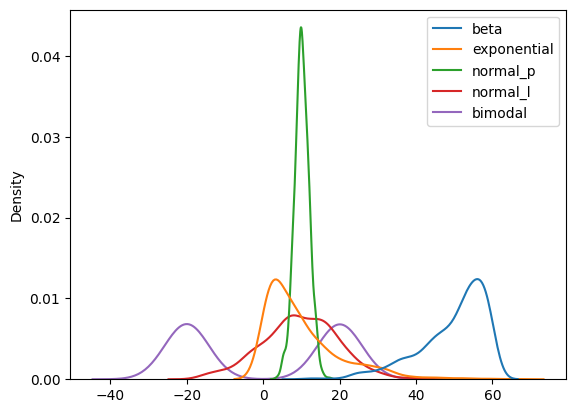

In [6]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.261902,10.158344,9.958576,10.125901,-0.149161
std,8.625577,9.977271,2.024907,10.113026,20.055243
min,15.748308,0.013014,2.025899,-21.126954,-28.895780
25%,45.448771,2.928805,8.609103,3.392188,-20.010748
50%,52.796950,7.262734,10.028602,10.091964,-0.297871
75%,57.189185,14.037199,11.391605,16.437168,19.547108
max,59.996821,62.183662,16.539261,46.119583,28.715543


<Axes: ylabel='Density'>

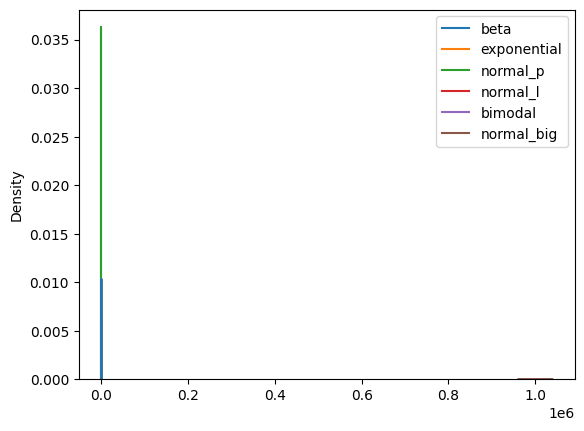

In [8]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

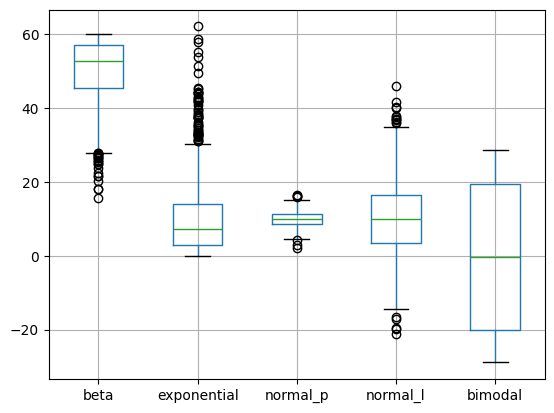

In [7]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [10]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [11]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.497090,1.174601,-0.800410,1.819815,0.933799,1.894370
1,0.116431,0.088981,-0.018444,-0.642285,0.894978,0.588898
2,0.791066,0.875646,-0.415938,-0.286888,0.610016,-0.730078
3,-2.727440,0.169693,0.607965,-0.406147,0.953778,-0.233198
4,0.711497,-0.947822,-0.972938,1.100004,1.060197,0.059326


<Axes: ylabel='Density'>

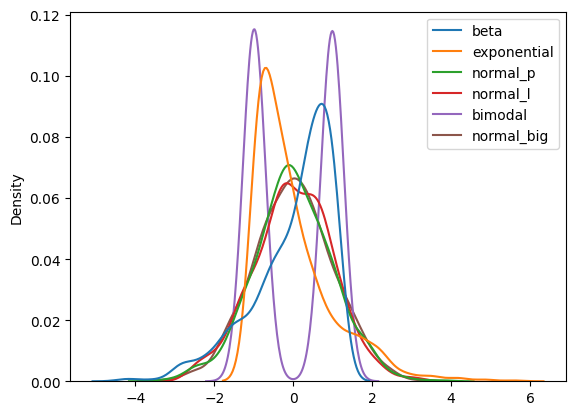

In [13]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,5.382361e-16,2.131628e-17,-5.648815e-16,1.527667e-16,0.000000,-1.488587e-14
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500,1.000500e+00
min,-4.329030e+00,-1.025542e+00,-3.407553e+00,-2.747515e+00,-1.453533,-3.185709e+00
25%,-5.290489e-01,-7.399761e-01,-6.298257e-01,-6.410242e-01,-0.987500,-6.762091e-01
50%,3.133092e-01,-2.991092e-01,-1.779845e-02,9.024220e-03,0.044327,-3.506215e-04
75%,7.540472e-01,4.155736e-01,6.324294e-01,6.893995e-01,0.992700,6.427343e-01
max,1.164551e+00,5.584468e+00,3.813176e+00,3.256117e+00,1.398796,3.205995e+00


<Axes: >

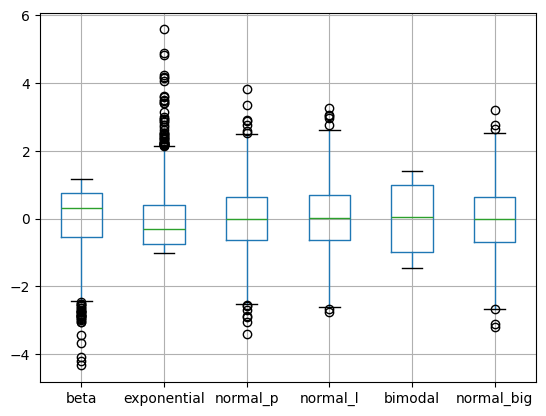

In [15]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

# [Thực hành] Chuẩn hoá dữ liệu với Min-Max Scaling

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [17]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [18]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [19]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,59.100835,10.690418,7.108469,-1.230181,24.145536
1,59.647368,14.213971,10.869734,21.024035,22.538044
2,56.851934,27.174377,8.472222,7.654746,24.011377
3,57.651642,11.721495,9.079805,9.767819,20.353488
4,57.087028,10.573858,12.516099,-1.684208,21.574826


<Axes: ylabel='Density'>

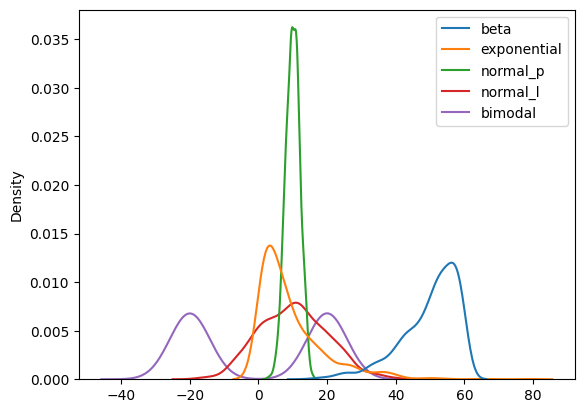

In [20]:
sns.kdeplot(data=df)

In [21]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.958479,9.447286,9.983946,10.217126,-0.003569
std,8.381099,9.637945,2.061522,9.886466,20.212899
min,14.899709,0.016700,2.832122,-17.574659,-30.537417
25%,45.498189,2.616702,8.542299,2.852281,-19.996046
50%,52.230065,6.381978,10.015828,10.196555,-0.181536
75%,56.483328,13.092083,11.351247,17.010031,20.038239
max,59.990553,78.289059,15.786246,40.640220,28.923002


<Axes: ylabel='Density'>

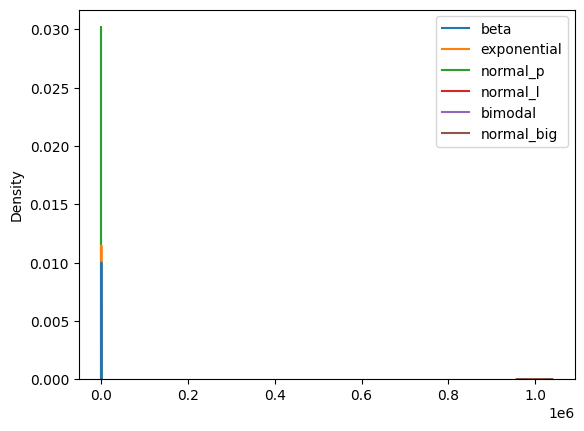

In [22]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<Axes: >

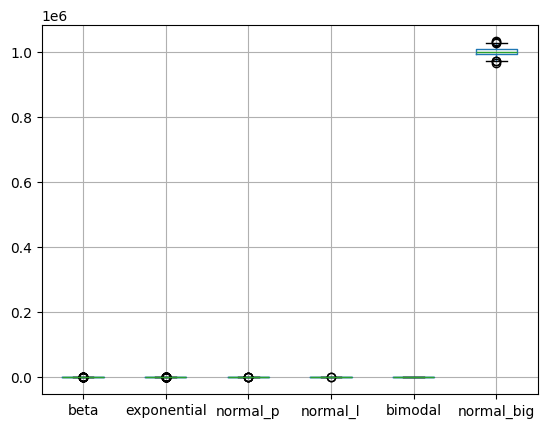

In [23]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [24]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [25]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [26]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.980268,0.136366,0.330115,0.280761,0.919653,0.683512
1,0.992389,0.181383,0.620467,0.663038,0.892618,0.761695
2,0.930393,0.346964,0.435390,0.433384,0.917397,0.389790
3,0.948129,0.149539,0.482293,0.469682,0.855879,0.715255
4,0.935607,0.134877,0.747559,0.272962,0.876419,0.282195


<Axes: ylabel='Density'>

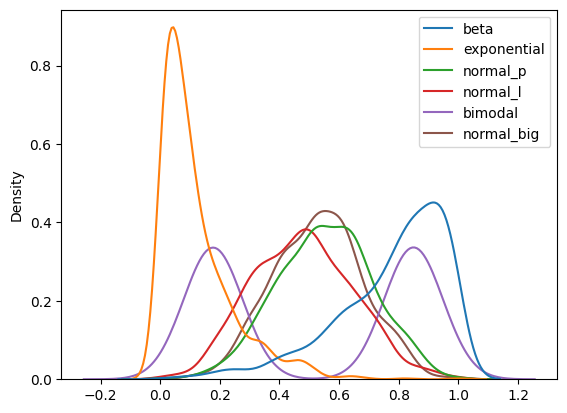

In [27]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<Axes: >

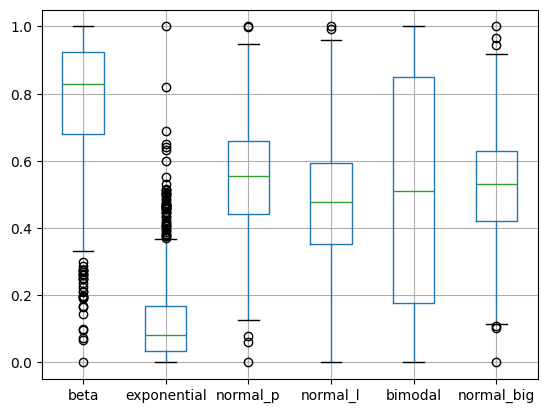

In [28]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [29]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.777514,0.120484,0.552089,0.477400,0.513516,0.528301
std,0.185871,0.123133,0.159140,0.169827,0.339939,0.150373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.678596,0.033217,0.440800,0.350889,0.177284,0.420341
50%,0.827892,0.081322,0.554550,0.477047,0.510522,0.531695
75%,0.922219,0.167050,0.657638,0.594087,0.850577,0.627514
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [31]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [32]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[14.899708545978669,
 0.016700122501516142,
 2.8321216413829076,
 -17.57465909146027,
 -30.537417162544273,
 964917.1233274017]

In [33]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [34]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.99055327131745,
 78.28905938500236,
 15.786245923791721,
 40.64022036337879,
 28.923002400417495,
 1031852.6038814877]

In [35]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0, 0.9999999999999999, 1.0, 1.0, 1.0]

# [Thực hành] Chuẩn hoá dữ liệu với Robust Scaling

In [40]:
from sklearn.preprocessing import RobustScaler

# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

In [41]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [42]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.625460,0.411292,-1.035034,-0.807101,0.607656,0.732804
1,0.675212,0.747657,0.303995,0.764774,0.567503,1.110183
2,0.420738,1.984882,-0.549532,-0.179535,0.604305,-0.684961
3,0.493537,0.509720,-0.333229,-0.030283,0.512936,0.886021
4,0.442139,0.400165,0.890109,-0.839170,0.543443,-1.204310


<Axes: ylabel='Density'>

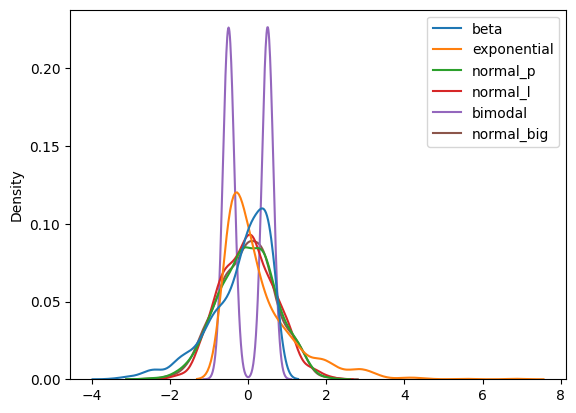

In [43]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [44]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,-0.206787,2.926202e-01,-1.134999e-02,0.001453,0.004445,-0.016384
std,0.762949,9.200567e-01,7.339121e-01,0.698308,0.504890,0.725833
min,-3.398260,-6.076417e-01,-2.557436e+00,-1.961556,-0.758247,-2.566433
25%,-0.612817,-3.594405e-01,-5.245839e-01,-0.518746,-0.494939,-0.537493
50%,0.000000,-4.239230e-17,3.162076e-16,0.000000,0.000000,0.000000
75%,0.387183,6.405595e-01,4.754161e-01,0.481254,0.505061,0.462507
max,0.706453,6.864388e+00,2.054298e+00,2.150318,0.726990,2.260455


<Axes: >

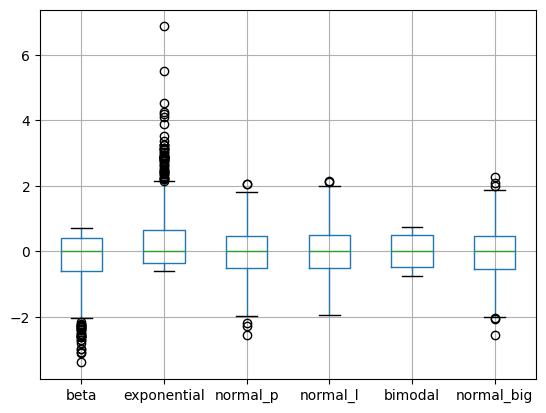

In [45]:
df_s.boxplot()

In [46]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.398259811365937,
 -0.6076417100876976,
 -2.5574356361653776,
 -1.9615556569250274,
 -0.7582471302286672,
 -2.5664334587490076]

In [47]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.7064533379330176,
 6.864388205974019,
 2.054297940113802,
 2.1503180472685943,
 0.7269903328918613,
 2.260454937172607]

In [48]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([ 5.22300651e+01,  6.38197847e+00,  1.00158278e+01,  1.01965553e+01,
       -1.81535618e-01,  1.00050640e+06])

# [Thực hành] Phân tích review của khách hàng

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [9]:
df = pd.read_csv("Credit_Scoring.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [10]:
# thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [11]:
# mô tả dữ liệu
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,75004.500000,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,43299.105125,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37506.750000,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75004.500000,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112502.250000,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Tiến hành xử lý dữ liệu khuyết thiếu

In [12]:
# kiểm tra dữ liệu khuyết thiếu
df.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,True,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


In [54]:
# loại bỏ dữ liệu khuyết thiếu
df1 = df.dropna()

In [55]:
# % số lượng bản ghi còn lại
100 * df1.shape[0]/df.shape[0]

80.17894287695344

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

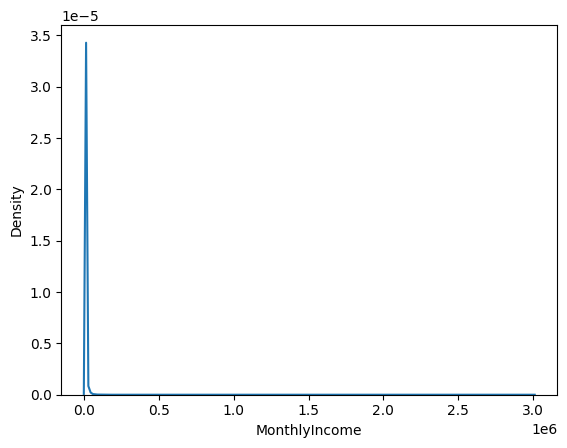

In [56]:
# vẽ biểu đồ phân bố
sns.kdeplot(data=df1["MonthlyIncome"])

In [13]:
# thay thế dữ liệu khuyết thiếu bởi giá trị nội suy theo cột
df2 = df.interpolate(axis=1)

In [14]:
df2.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,False,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
# vẽ biểu đồ boxplot cho các đặc trưng
df2.boxplot()

<Axes: >

<Axes: ylabel='MonthlyIncome'>

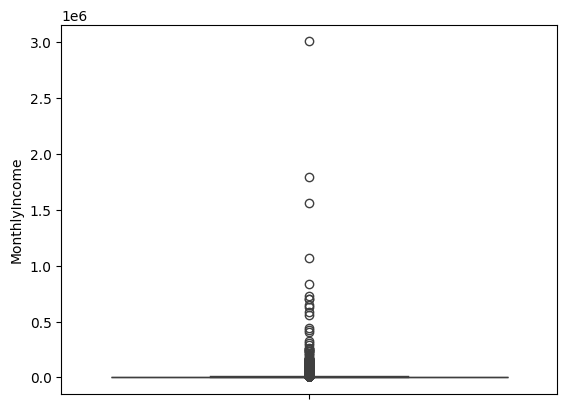

In [60]:
# vẽ biểu đồ box plot cho MonthlyIncome
sns.boxplot(df2["MonthlyIncome"])

## Tiến hành xử lý dữ liệu ngoại lai

In [16]:
# tính giá trị Q1 và Q3
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

# tính IQR 
IQR = Q3-Q1

In [17]:
# lọc dữ liệu ngoại lai
df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

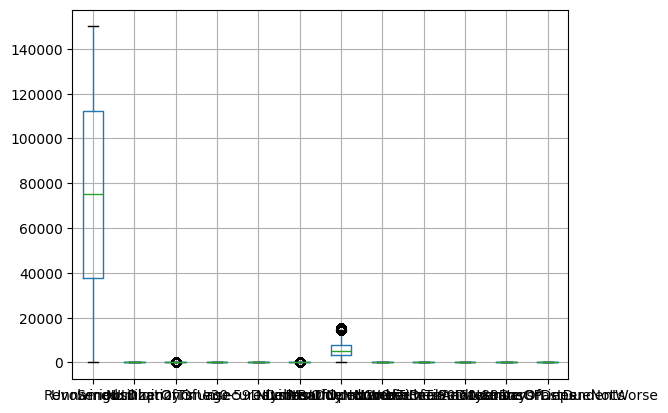

In [64]:
df3.boxplot()

<Axes: ylabel='MonthlyIncome'>

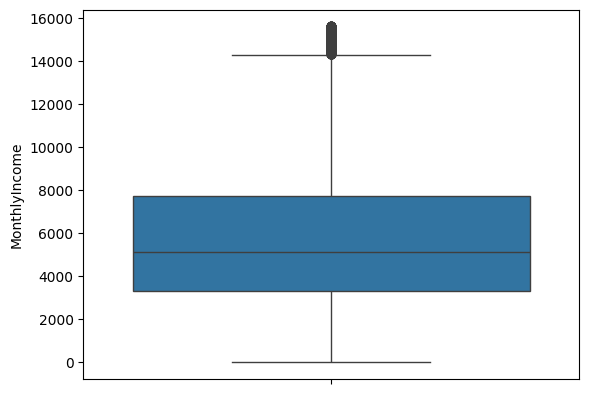

In [65]:
sns.boxplot(df3["MonthlyIncome"])

In [66]:
df3.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,76890.000000,76890.0,76890.000000,76890.000000,76890.0,76890.000000,76890.000000,76890.000000,76890.0,76890.000000,76890.0,76890.000000
mean,75092.319508,0.0,0.264318,52.929185,0.0,0.317611,5714.681226,8.049395,0.0,0.931552,0.0,0.518390
std,43259.698005,0.0,0.317195,15.385704,0.0,0.281695,3249.853682,4.299490,0.0,0.942512,0.0,0.743525
min,11.000000,0.0,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,37747.250000,0.0,0.023148,41.000000,0.0,0.111378,3312.000000,5.000000,0.0,0.000000,0.0,0.000000
50%,75268.500000,0.0,0.111537,53.000000,0.0,0.268449,5125.000000,7.000000,0.0,1.000000,0.0,0.000000
75%,112463.750000,0.0,0.417336,64.000000,0.0,0.443096,7705.750000,11.000000,0.0,2.000000,0.0,1.000000
max,150000.000000,0.0,1.341700,96.000000,0.0,1.908046,15605.000000,20.000000,0.0,5.000000,0.0,2.000000


## Chuẩn hóa dữ liệu

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

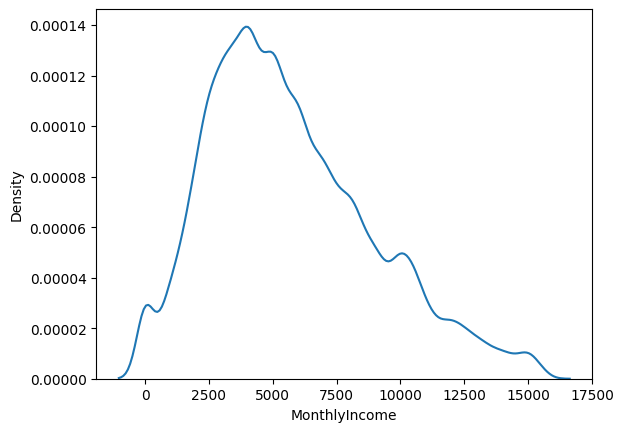

In [67]:
# phân bố dữ liệu trên cột MonthlyIncome
sns.kdeplot(data = df3['MonthlyIncome'])

In [68]:
# chuẩn hóa với minmax scaling
scaler = MinMaxScaler()

mms = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

<Axes: ylabel='Density'>

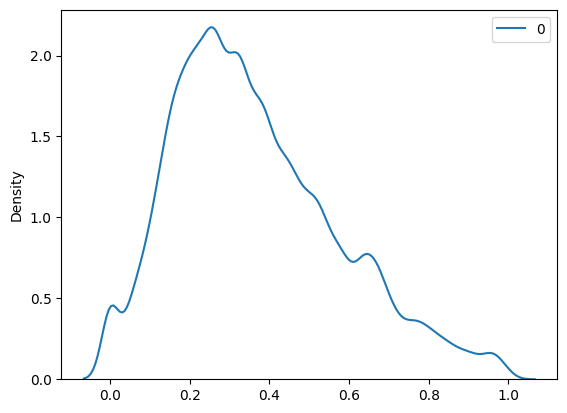

In [69]:
sns.kdeplot(data = mms)

In [70]:
# chuẩn hóa với robust scaling
scaler = RobustScaler()

rbs = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

<Axes: ylabel='Density'>

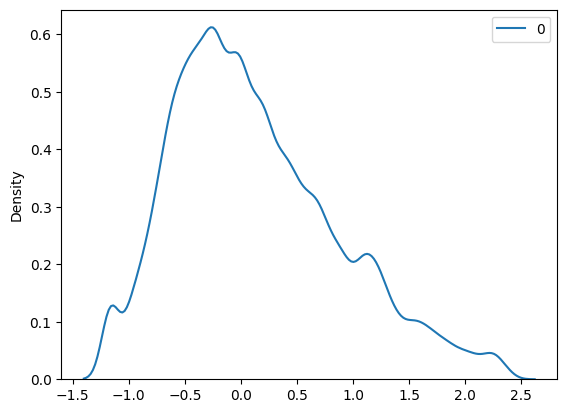

In [71]:
sns.kdeplot(data = rbs)

In [72]:
# chuẩn hóa với standard scaling
scaler = StandardScaler()

sc = scaler.fit_transform(pd.DataFrame(df3['MonthlyIncome']))

<Axes: ylabel='Density'>

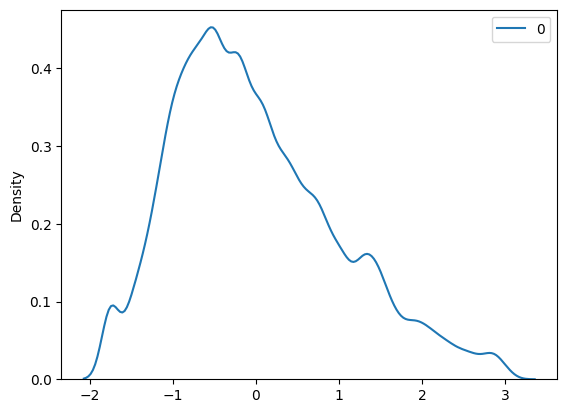

In [73]:
sns.kdeplot(data = sc)